Step 1: Load the Iris Dataset

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 2: Create a plot of the data using all features to show positive and negative correlations

/Users/aashiqebrahim/miniconda3/envs/base_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


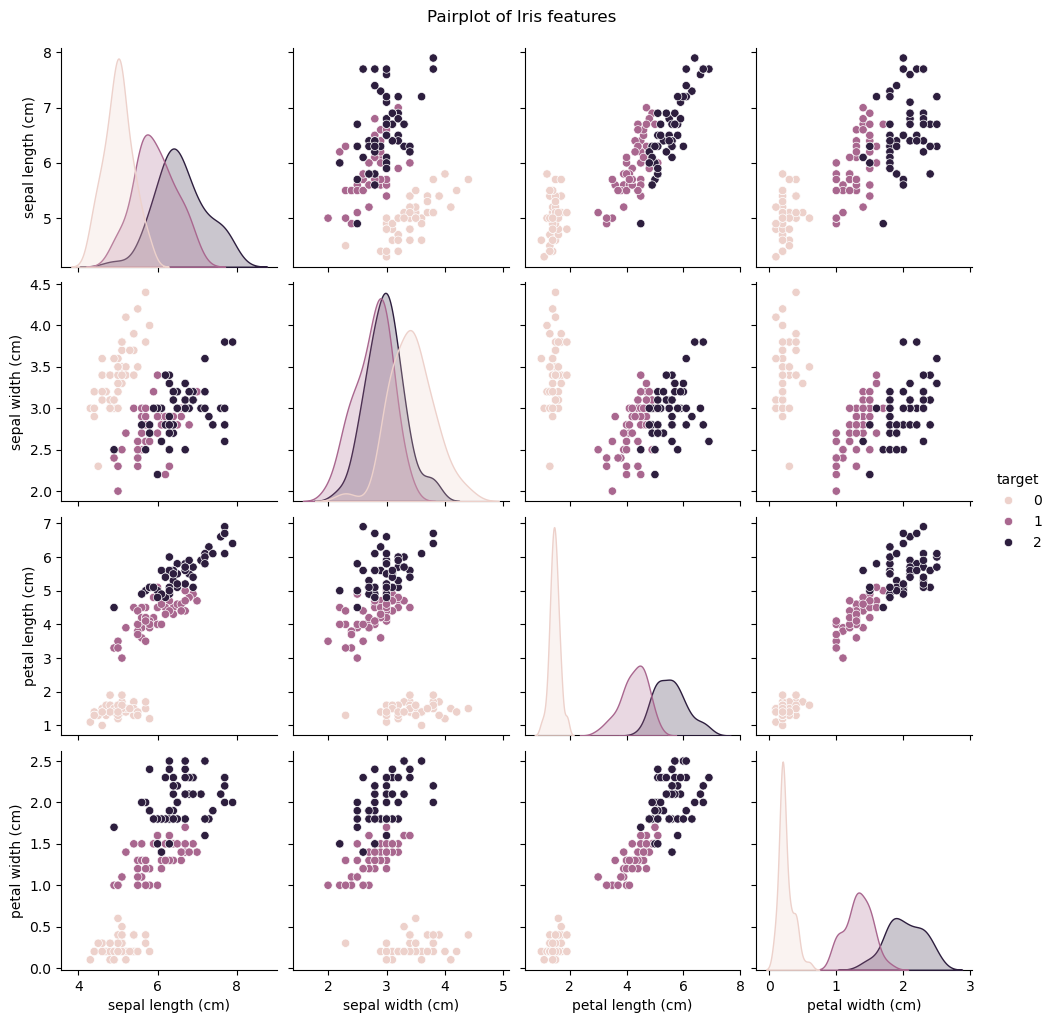

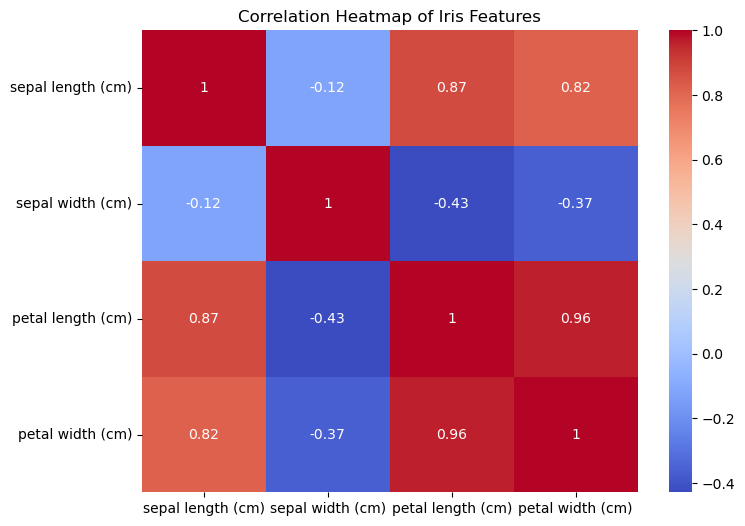

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(df, hue="target", diag_kind="kde")
plt.suptitle("Pairplot of Iris features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Features")
plt.show()

# Comments for Pairplots or Iris Features
- Clear class separation is visible mostly on petal length and petal width
- Strong linear correlations exist between:
    Petal length & Petal width (positively correlated).
    Sepal length & Petal length (positively correlated).
- Sepal width is less correlated with other features and exhibits more variance within classes

# Comments for Correlation Heatmap
Interpretation:
    High positive correlation:
        - Petal Length & petal width: 0.96
        - Sepal length & petal length: 0.87
        - Sepal length & petal width: 0.82
    
    Negative or weak correlation:
        - Sepal width has low/negative correlation with the rest, indicating it brings unique variance.

This confirms redundancy: features like petal length and petal width contain overlapping information

Step 3: Scale the data and apply PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df.drop('target', axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

Step 4: Plot the transformed version of the data

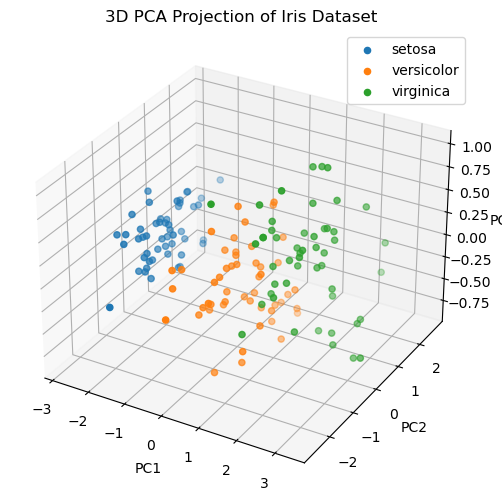

In [13]:
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = df['target']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for label in pca_df['target'].unique():
    subset = pca_df[pca_df['target'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=iris.target_names[label])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection of Iris Dataset")
ax.legend()
plt.show()

# Comments: 3D PCA Plot

Interpretation:
    - PCA has transformed the 4D data into 3 principal components (PC1, PC2, PC3).
    
    - The transformed space still separates species well( especially Setosa from the rest), even in 3D

    - Indicating PCA has preserved essential class-discriminative structure while removing redundancy.

    - The separation is likely driven by high-variance features
